<a href="https://colab.research.google.com/github/nv-bel/cliente-compra-concessionaria/blob/main/Integra%C3%A7%C3%A3o_e_An%C3%A1lise_de_Dados_com_SQLite_e_Pandas_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sobre o Banco de Dados

O banco de dados é projetado para lidar com as operações diárias de uma grande empresa automobilística.

Ele fornece funcionalidade para visualizar as transações dos concessionários, rastrear o inventário de carros e manter os modelos e as opções disponíveis dos carros. O banco de dados chaves primárias e estrangeiras para garantir que as restrições do banco de dados sejam mantidas. Cada entidade possui um ID autogerado para garantir que sejam únicas e para facilitar as transformações.

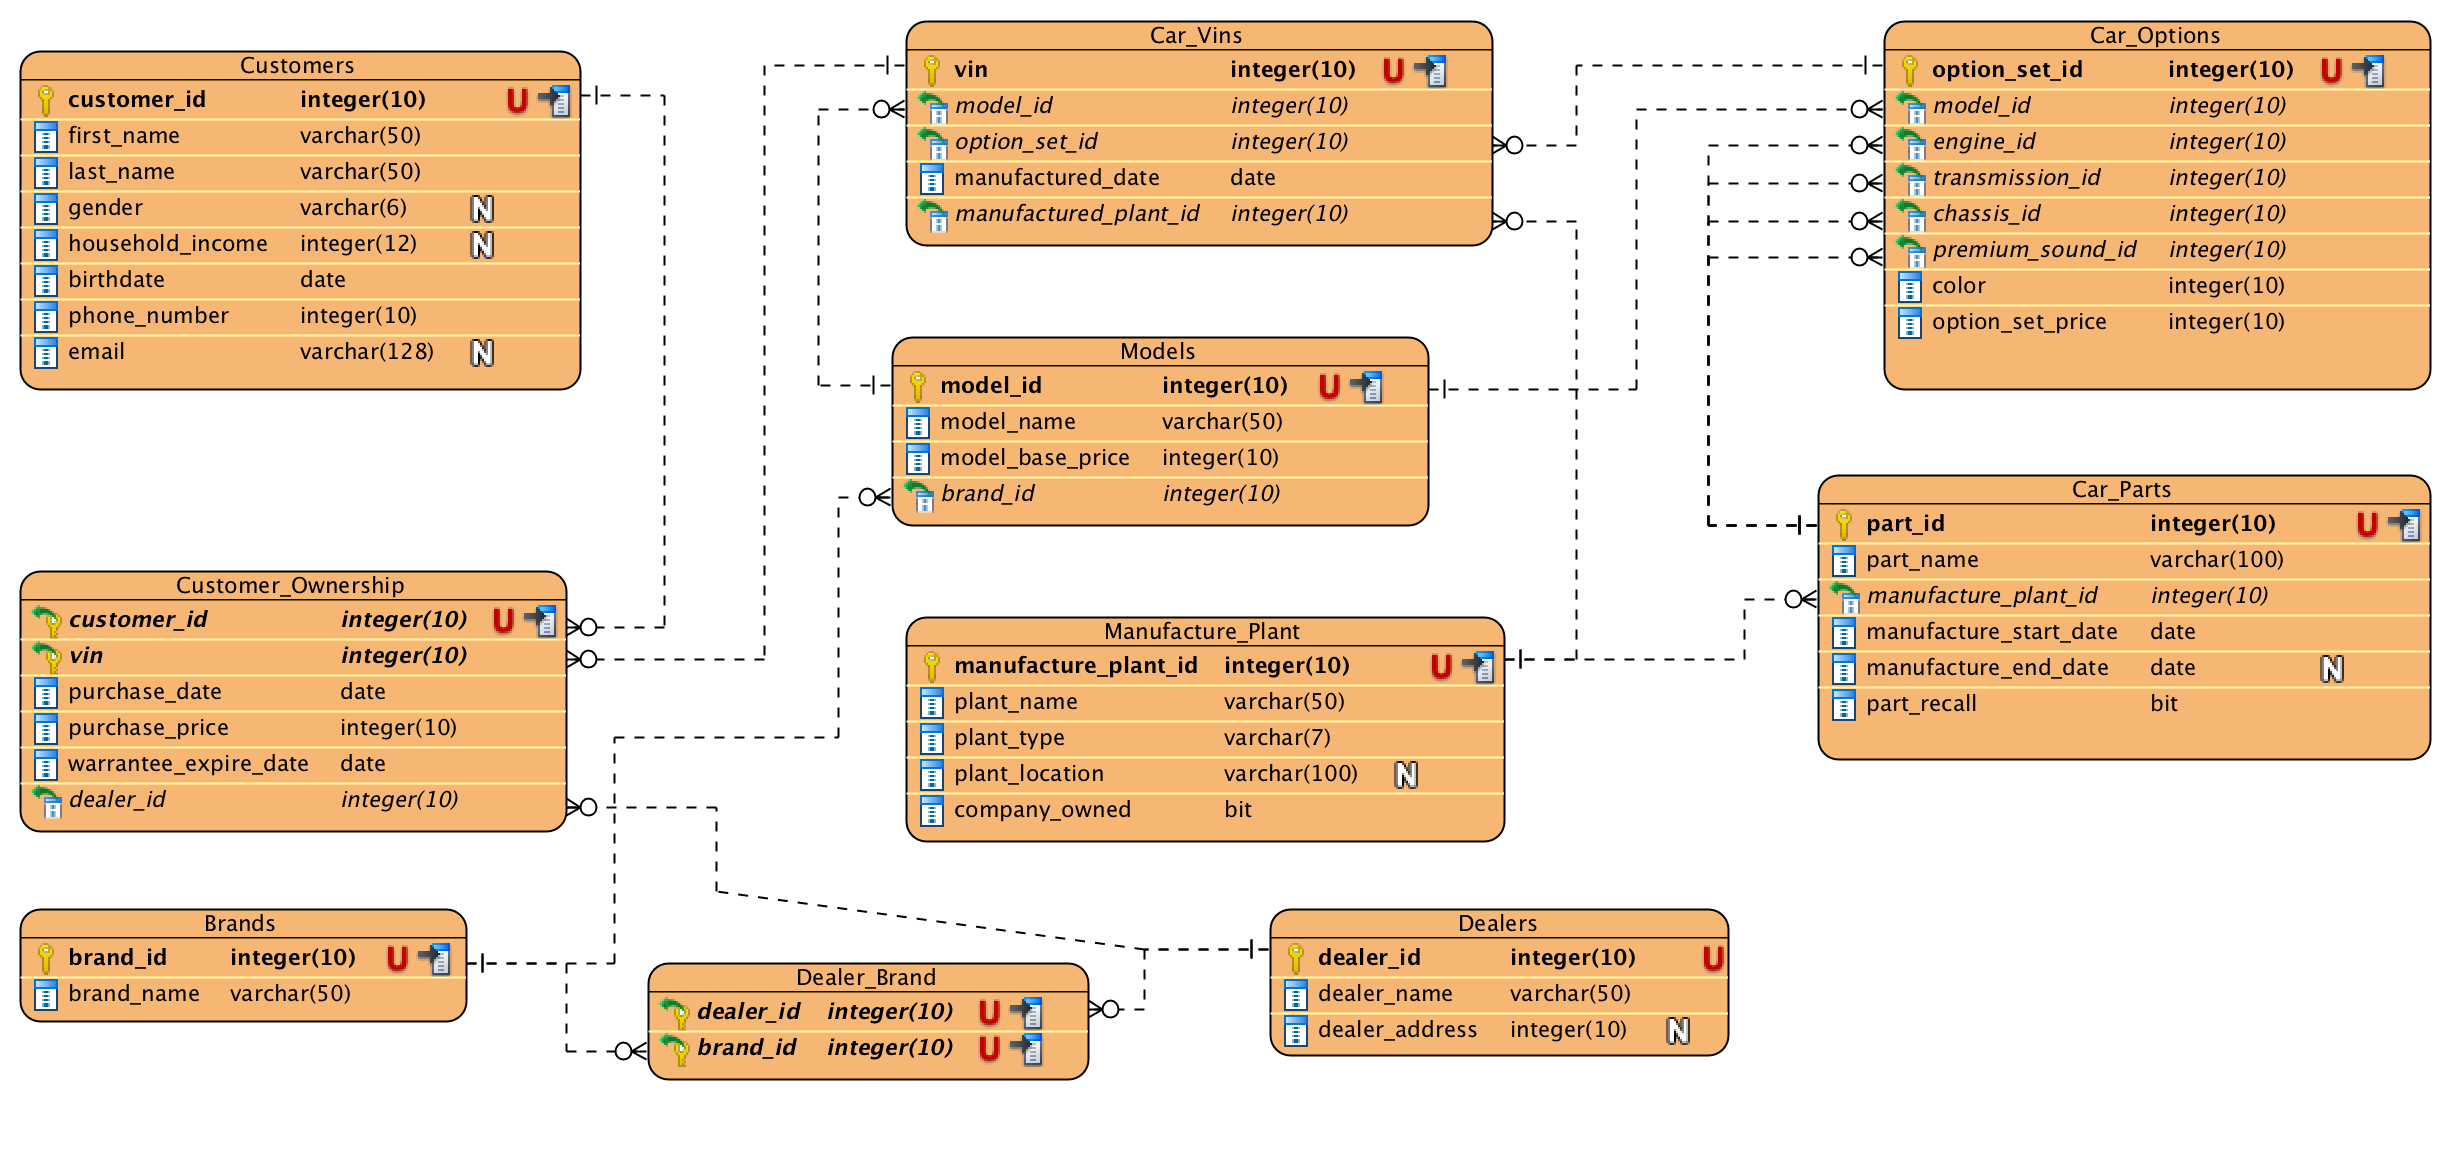

- Analise de Clientes x Compras

In [ ]:
import sqlite3
import pandas as pd

try:
    conn = sqlite3.connect('Car_Database.db')
    print("Conexão com o banco de dados estabelecida com sucesso.")
except sqlite3.Error as e:
    print(f"Erro ao conectar ao banco de dados: {e}")
    conn = None

# Cria um objeto cursor para interagir com o banco de dados
cursor = conn.cursor()

Conexão com o banco de dados estabelecida com sucesso.


In [ ]:
# Consulta SQL para obter todos os nomes das tabelas no banco de dados
query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)

# Recupera todos os nomes das tabelas
tables = cursor.fetchall()

print("Tabelas na base de dados:")
for table in tables:
    print(f"- {table[0]}")

Tabelas na base de dados:
- Customers
- sqlite_sequence
- Models
- Customer_Ownership
- Dealer_Brand
- Car_Parts
- Manufacture_Plant
- Brands
- Dealers
- Car_Options
- Car_Vins


In [ ]:
query = """
SELECT C.customer_id, C.gender, C.household_income, CO.purchase_price, M.model_name, M.model_base_price, B.brand_name
FROM Customers C
INNER JOIN Customer_Ownership CO ON C.customer_id = CO.customer_id
INNER JOIN Car_Vins CV ON CO.vin = CV.vin
INNER JOIN Models M ON CV.model_id = M.model_id
INNER JOIN Brands B ON M.brand_id = B.brand_id;
"""
cursor.execute(query)
results = cursor.fetchall()

df_atv_clientes = pd.DataFrame(results, columns=[desc[0] for desc in cursor.description])

print('Atividade dos clientes (original)')
df_atv_clientes

# Analisar o perfil de compra dos tipos de clientes. Analise de renda, gênero e poder de compra.

# Customer_id == 4 Não fez nenhuma compra, confirmado substituindo o INNER Join pelo LEFT Join.

Atividade dos clientes (original)


,customer_id,gender,household_income,purchase_price,model_name,model_base_price,brand_name
0,6,Female,120000,17200,Orange,15000,Yellow
1,5,Female,200000,33000,Extra,30000,Boujiee
2,2,Female,60000,121300,F12 Berlinetta,110000,Ferrari
3,3,Male,24000,26000,The Brunette,25000,Cover Squirrel
4,1,Male,120000,24000,Hat,22000,Supreme


Vimos que para essa análise, o banco nos trouxe apenas 5 dados, o que limita a amostragem.
Para resolver isso, iremos inserir alguns dados no df gerado (*df_atv_clientes*). O database original utilizado se manterá intacto.

In [ ]:
import random

modelos = [
    {'model_name': 'Corolla', 'model_base_price': 20000, 'brand_name': 'Toyota'},
    {'model_name': 'Civic', 'model_base_price': 22000, 'brand_name': 'Honda'},
    {'model_name': 'Focus', 'model_base_price': 21000, 'brand_name': 'Ford'},
    {'model_name': 'Malibu', 'model_base_price': 23000, 'brand_name': 'Chevrolet'},
    {'model_name': 'Altima', 'model_base_price': 24000, 'brand_name': 'Nissan'},
    {'model_name': 'Kicks', 'model_base_price': 19500, 'brand_name': 'Nissan'},
    {'model_name': 'Yaris', 'model_base_price': 20000, 'brand_name': 'Toyota'},
    {'model_name': 'Trax', 'model_base_price': 24000, 'brand_name': 'Chevrolet'},
    {'model_name': 'A4', 'model_base_price': 40000, 'brand_name': 'Audi'},
    {'model_name': 'IS', 'model_base_price': 39000, 'brand_name': 'Lexus'},
    {'model_name': 'Model 3', 'model_base_price': 40000, 'brand_name': 'Tesla'},
    {'model_name': 'Elantra', 'model_base_price': 19000, 'brand_name': 'Hyundai'},
    {'model_name': 'Optima', 'model_base_price': 21000, 'brand_name': 'Kia'},
    {'model_name': 'Jetta', 'model_base_price': 20000, 'brand_name': 'Volkswagen'},
    {'model_name': 'Impreza', 'model_base_price': 22000, 'brand_name': 'Subaru'},
    {'model_name': '3', 'model_base_price': 21000, 'brand_name': 'Mazda'},
    {'model_name': 'Sonata', 'model_base_price': 25000, 'brand_name': 'Hyundai'},
    {'model_name': 'Forte', 'model_base_price': 18500, 'brand_name': 'Kia'},
    {'model_name': 'Fusion', 'model_base_price': 27000, 'brand_name': 'Ford'},
    {'model_name': 'F-350', 'model_base_price': 39000, 'brand_name': 'Ford'},
    {'model_name': 'Cruze', 'model_base_price': 18000, 'brand_name': 'Chevrolet'},
    {'model_name': 'Traverse', 'model_base_price': 33100, 'brand_name': 'Chevrolet'},
    {'model_name': 'Camry', 'model_base_price': 28000, 'brand_name': 'Toyota'},
    {'model_name': 'Accord', 'model_base_price': 27500, 'brand_name': 'Honda'},
    {'model_name': 'HR-V', 'model_base_price': 20500, 'brand_name': 'Honda'},
    {'model_name': 'Passat', 'model_base_price': 29500, 'brand_name': 'Volkswagen'},
    {'model_name': 'EQS 450+', 'model_base_price': 95000, 'brand_name': 'Mercedes-Benz'},
    {'model_name': 'Corolla Cross', 'model_base_price': 24000, 'brand_name': 'Toyota'},
    {'model_name': 'Golf R', 'model_base_price': 39800, 'brand_name': 'Volkswagen'},
    {'model_name': 'Ranger', 'model_base_price': 24300, 'brand_name': 'Ford'},
    {'model_name': 'Mustang', 'model_base_price': 27000, 'brand_name': 'Ford'},
    {'model_name': 'Taycan Cross Turismo', 'model_base_price': 92500, 'brand_name': 'Porsche'}, #32
    {'model_name': 'Wrangler 4xe', 'model_base_price': 47200, 'brand_name': 'Jeep'},
    {'model_name': 'Expedition', 'model_base_price': 61700, 'brand_name': 'Ford'},
    {'model_name': 'Grand Wagoneer Series II', 'model_base_price': 71300, 'brand_name': 'Jeep'},
    {'model_name': 'Wagoneer L', 'model_base_price': 91000, 'brand_name': 'Jeep'},
    {'model_name': 'Tahoe 4WD High Country', 'model_base_price': 70000, 'brand_name': 'Chevrolet'},
    {'model_name': 'Corvette Stingray', 'model_base_price': 76000, 'brand_name': 'Chevrolet'},
    {'model_name': 'Paralisade Limited', 'model_base_price': 42000, 'brand_name': 'Hyundai'},
    {'model_name': 'Bronco Raptor', 'model_base_price': 68400, 'brand_name': 'Ford'},
    {'model_name': 'EV9 GT-Line', 'model_base_price': 64700, 'brand_name': 'Kia'},
    {'model_name': 'S4 Prestige', 'model_base_price': 59800, 'brand_name': 'Audi'},
    {'model_name': 'S8', 'model_base_price': 108500, 'brand_name': 'Audi'},
    {'model_name': 'Portofino', 'model_base_price': 210000, 'brand_name': 'Ferrari'},
    {'model_name': 'Nexo', 'model_base_price': 59000, 'brand_name': 'Hyundai'},
    # 45 novos modelos de carros adicionados.
    # Valores baseados em consultas no google, em sua maioria no site cars.com
]

povoar_df = {
    'customer_id': list(range(7, 50)),
    'gender': random.choices(['Male', 'Female'], k=43), #aleatorizar a inserção das opções de gênero
    'household_income': [random.randrange(21000, 197001, 1000) for _ in range(43)], #aleatorizar a renda familiar de 21k a 197k, de mil em mil
    'purchase_price': [],
    'model_name': [],
    'model_base_price': [],
    'brand_name': []
}

for _ in range(43):
    model = random.choice(modelos) #traz os modelos de carro p inserir no df imputado
    povoar_df['model_name'].append(model['model_name']) #imputa os nome dosmodelo
    povoar_df['model_base_price'].append(model['model_base_price']) #imputa os preco base dos carros
    povoar_df['brand_name'].append(model['brand_name']) #imputa o nome da marca
    purchase_price = model['model_base_price'] * (1 + random.uniform(0.10, 0.28)) #preco de compra sera 10% a 28% maior que o preco base
    povoar_df['purchase_price'].append(int(purchase_price)) #imputa o preco de compra do carro

df_imputado = pd.DataFrame(povoar_df)

# Concatena o df original (df_atv_clientes) com o df de dados adicionados (df_imputado)
df_pronto = pd.concat([df_atv_clientes, df_imputado], ignore_index=True).sort_values(by='customer_id')

# Fecha a conexão com o banco de dados
conn.close()

In [ ]:
df_pronto

,customer_id,gender,household_income,purchase_price,model_name,model_base_price,brand_name
4,1,Male,120000,24000,Hat,22000,Supreme
2,2,Female,60000,121300,F12 Berlinetta,110000,Ferrari
3,3,Male,24000,26000,The Brunette,25000,Cover Squirrel
1,5,Female,200000,33000,Extra,30000,Boujiee
0,6,Female,120000,17200,Orange,15000,Yellow
5,7,Male,46000,54509,Wrangler 4xe,47200,Jeep
6,8,Female,120000,43122,IS,39000,Lexus
7,9,Female,39000,26947,Altima,24000,Nissan
8,10,Male,59000,45815,F-350,39000,Ford
9,11,Female,110000,34755,Accord,27500,Honda


In [ ]:
# # Exportar o df para CSV

# df_pronto.to_csv('clientes_concessionaria.csv', index=False)

# Codigo foi comentado para que não sobrepusesse no .csv gerado e avaliado.

Agora que as tabelas do DataBase já foram selecionadas e exportadas para um .CSV, iremos partir para as análises dos clientes e suas compras.

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('clientes_concessionaria.csv')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customer_id       48 non-null     int64 
 1   gender            48 non-null     object
 2   household_income  48 non-null     int64 
 3   purchase_price    48 non-null     int64 
 4   model_name        48 non-null     object
 5   model_base_price  48 non-null     int64 
 6   brand_name        48 non-null     object
dtypes: int64(4), object(3)
memory usage: 2.8+ KB


In [ ]:
# Limpar df: Dropar coluna 'customer_id'
df = df.drop(['customer_id'], axis=1)
df.head()


,gender,household_income,purchase_price,model_name,model_base_price,brand_name
0,NaN,120000,24000,Hat,22000,Supreme
1,NaN,60000,121300,F12 Berlinetta,110000,Ferrari
2,NaN,24000,26000,The Brunette,25000,Cover Squirrel
3,NaN,200000,33000,Extra,30000,Boujiee
4,NaN,120000,17200,Orange,15000,Yellow


In [ ]:
df.describe()

,household_income,purchase_price,model_base_price
count,48.000000,48.000000,48.00000
mean,102937.500000,49147.083333,41793.75000
std,47009.915772,40441.634804,34566.56487
min,24000.000000,17200.000000,15000.00000
25%,60000.000000,26456.000000,22000.00000
50%,105500.000000,31704.000000,27250.00000
75%,135250.000000,58536.750000,50150.00000
max,200000.000000,243160.000000,210000.00000


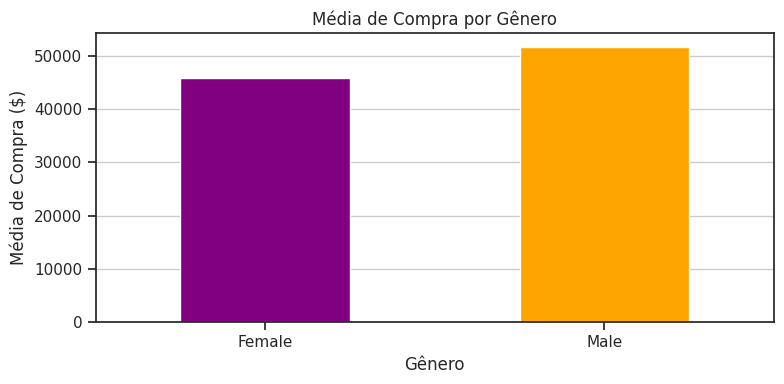

In [ ]:
# Gráfico para comparar Média de Compras por Gênero
plt.figure(figsize=(8, 4))
df.groupby('gender')['purchase_price'].mean().plot(kind='bar', color=['purple', 'orange'])
plt.title('Média de Compra por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Compra ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Nessa análise, diante das tabelas '*purchase_price*' (Preço de Compra - preço de aquisição do carro) e '*gender*', percebe-se que os homens compram/gastam, em média, mais do que as mulheres.

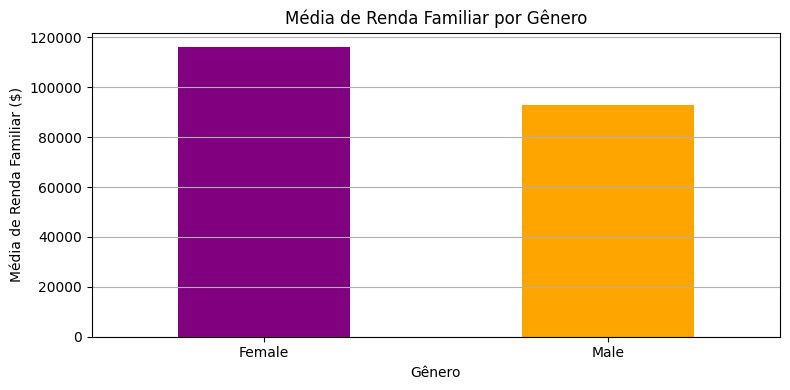

In [ ]:
# Gráfico para comparar Média de Renda Familiar por Gênero
plt.figure(figsize=(8, 4))
df.groupby('gender')['household_income'].mean().plot(kind='bar', color=['purple', 'orange'])
plt.title('Média de Renda Familiar por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Média de Renda Familiar ($)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Em contrapartida, as mulheres têm, em média, uma Renda Familiar maior que os homens

<Figure size 640x480 with 0 Axes>

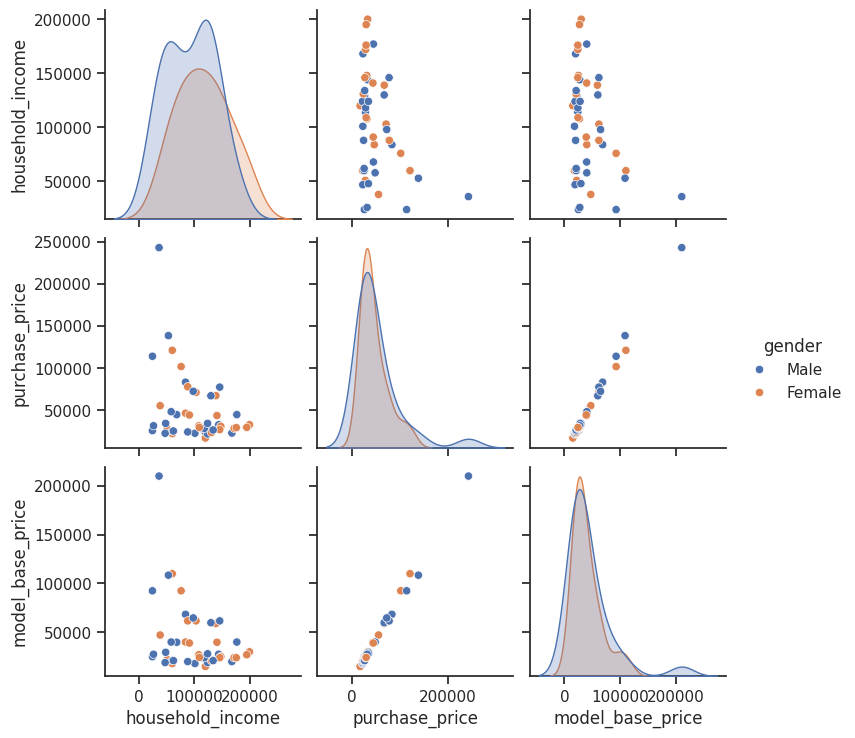

In [ ]:
sns.set_theme(style="ticks")
plt.suptitle('Customers')
sns.pairplot(df, hue='gender')

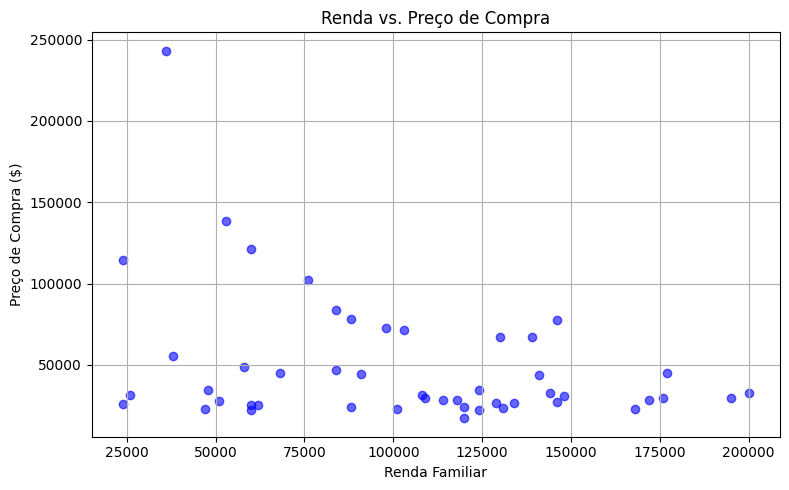

In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(df['household_income'], df['purchase_price'], color='blue', alpha=0.6)
plt.title('Renda vs. Preço de Compra')
plt.xlabel('Renda Familiar')
plt.ylabel('Preço de Compra ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

Comparando a tabela '*household_income*' (Renda Familiar) com a '*purchase_price*' (Preço de Compra), analisamos que:
- A maioria das pessoas compraram Carros de até 50.000;
- A Renda Familiar dessas pessoas que gastaram até 50.000, uma pequena concentrção está entre 100k a 150k
- Pessoas com salários maiores compraram carros mais baratos;

Agora faremos essa análise partindo do gênero:

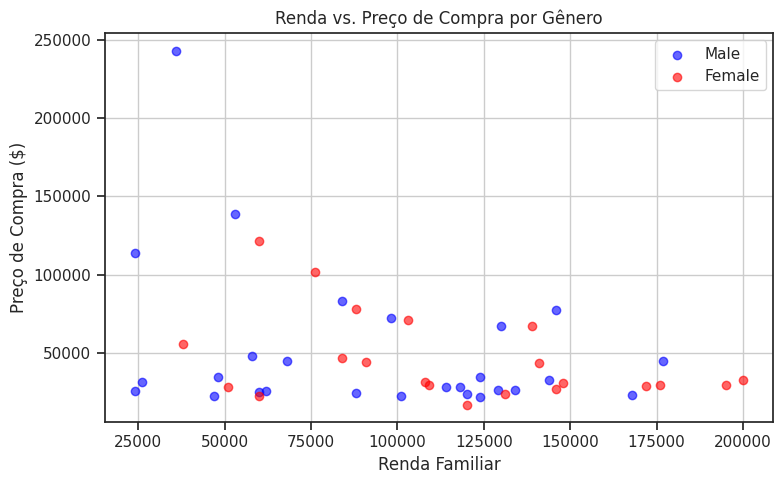

In [ ]:
colors = {'Male': 'blue', 'Female': 'red'}

plt.figure(figsize=(8, 5))
# Iterando sobre cada gênero para criar o gráfico de dispersão
for gender, color in colors.items():
    plt.scatter(df.loc[df['gender'] == gender, 'household_income'],
                df.loc[df['gender'] == gender, 'purchase_price'],
                color=color,
                label=gender,
                alpha=0.6)

plt.title('Renda vs. Preço de Compra por Gênero')
plt.xlabel('Renda Familiar')
plt.ylabel('Preço de Compra ($)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Pequena quantidade de homens que aparentemente ganharam menos e gastaram mais, no entanto, nenhuma quantidade significativa para apontar algo mais concreto.

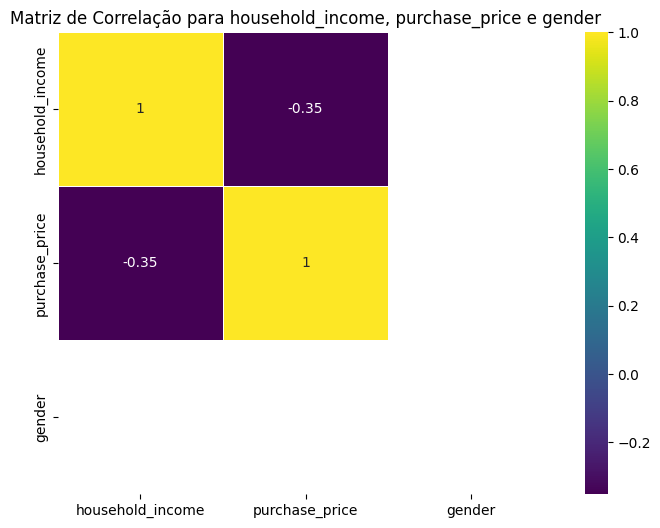

In [ ]:
from scipy.stats import pointbiserialr
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])

# Verificar e remover valores NaN ou infinitos
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['household_income', 'purchase_price'])

# Calcular a matriz de correlação
correlation_matrix = df[['household_income', 'purchase_price', 'gender']].corr()

# Exibir matriz de correlação usando um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', linewidths=0.5)
plt.title('Matriz de Correlação para household_income, purchase_price e gender')
plt.show()

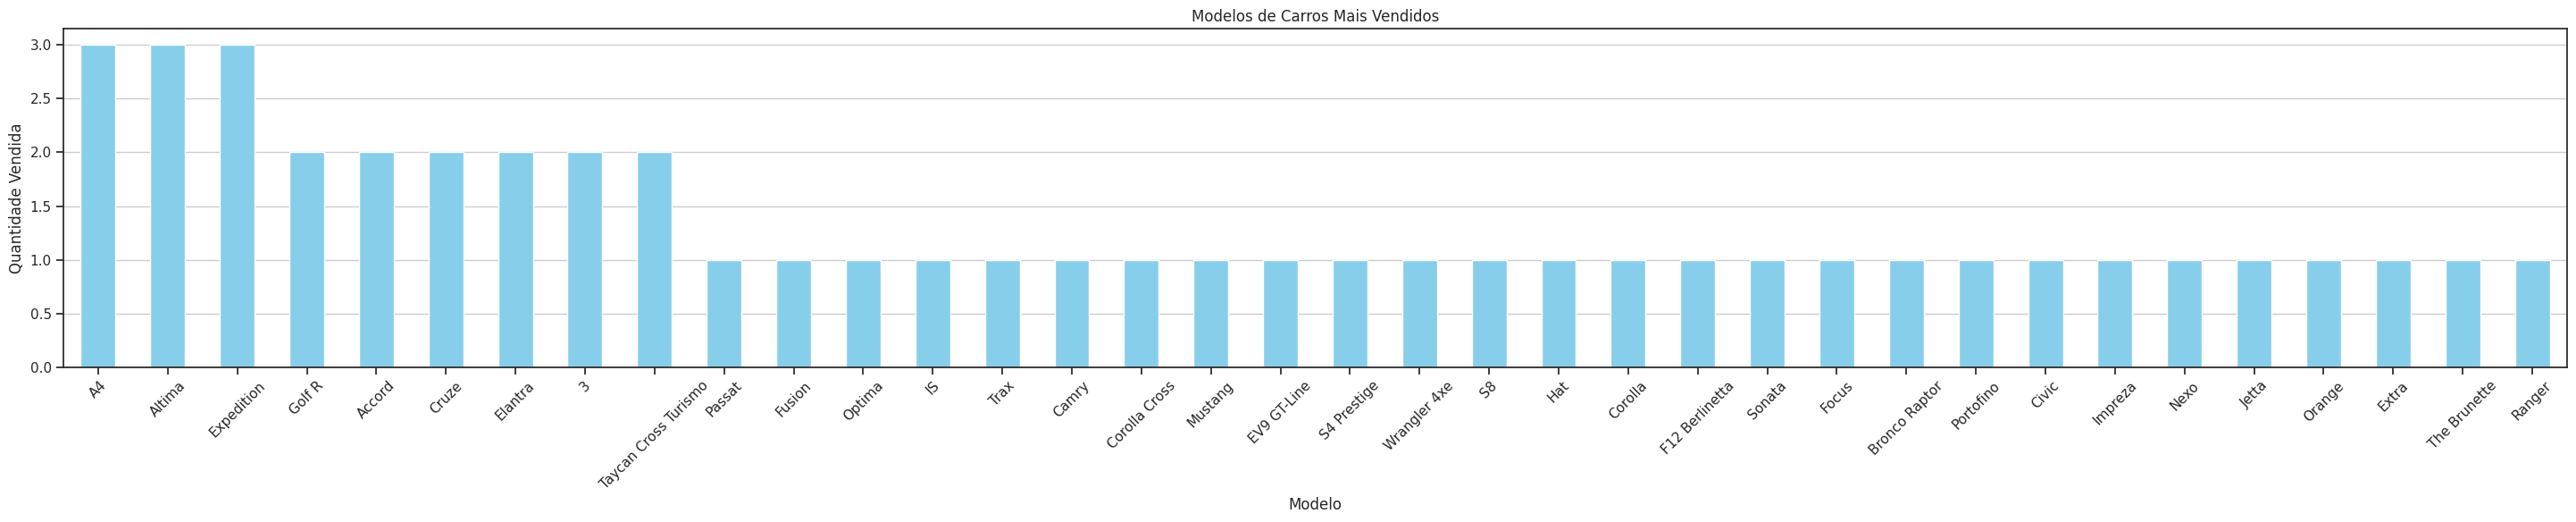

In [ ]:
plt.figure(figsize=(29, 6))
model_counts = df['model_name'].value_counts()
model_counts.plot(kind='bar', color='skyblue')
plt.title('Modelos de Carros Mais Vendidos')
plt.xlabel('Modelo')
plt.ylabel('Quantidade Vendida')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Os modelos mais vendidos foram A4 (Audi), Altima (Nissan) e Expedition (Ford), todos com 3 unidades vendidas.

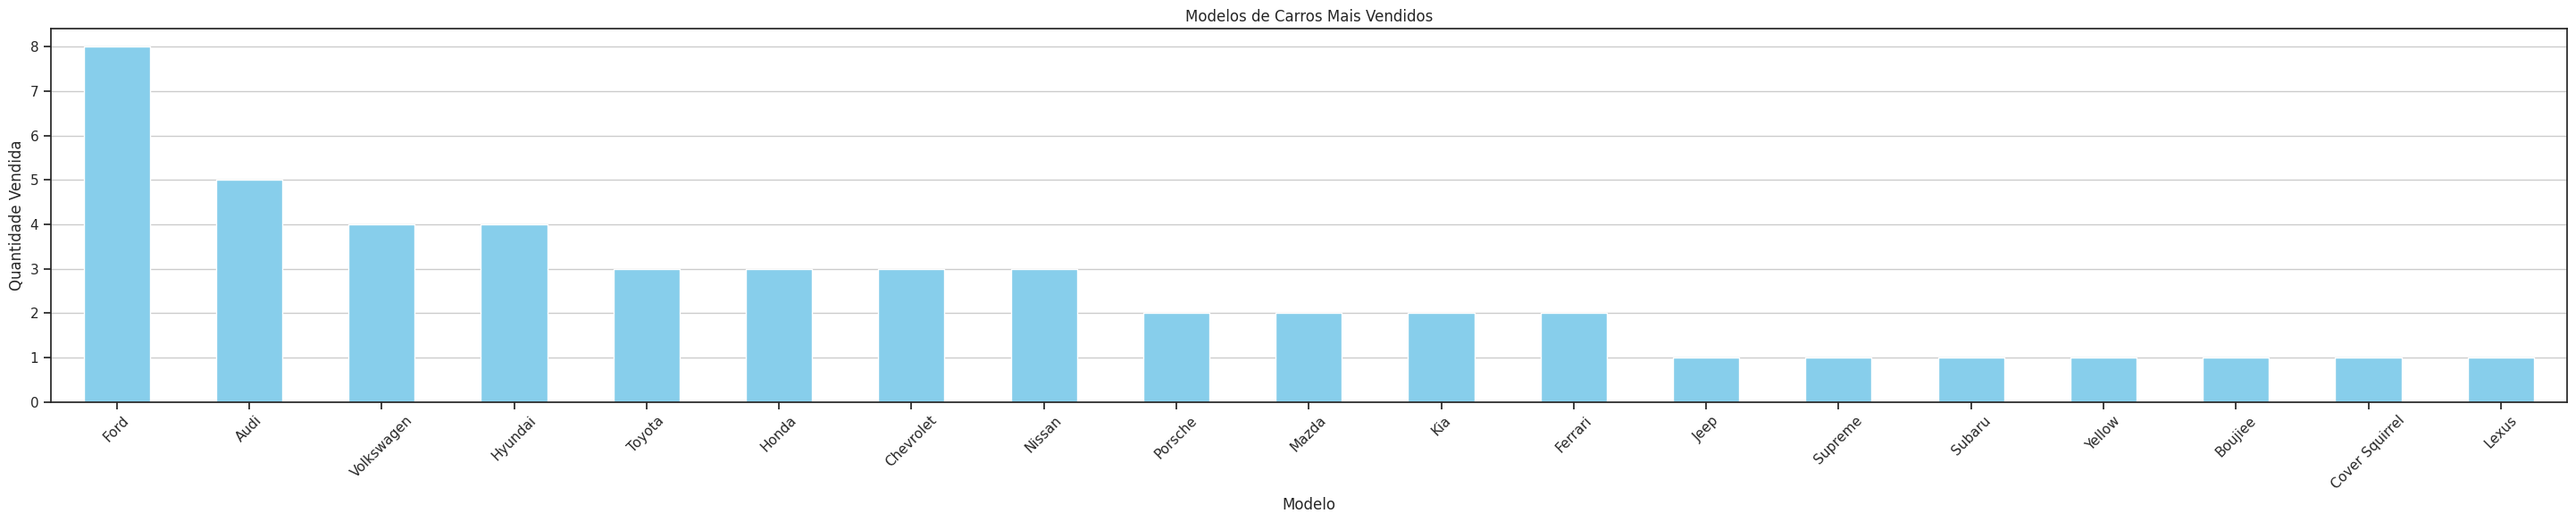

In [ ]:
plt.figure(figsize=(29, 6))
model_counts = df['brand_name'].value_counts()
model_counts.plot(kind='bar', color='skyblue')
plt.title('Modelos de Carros Mais Vendidos')
plt.xlabel('Modelo')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


Ford liderou as vendas, seguida por Audi, depois Volkswagen e Hyundai, ambos com a mesma quantidade.

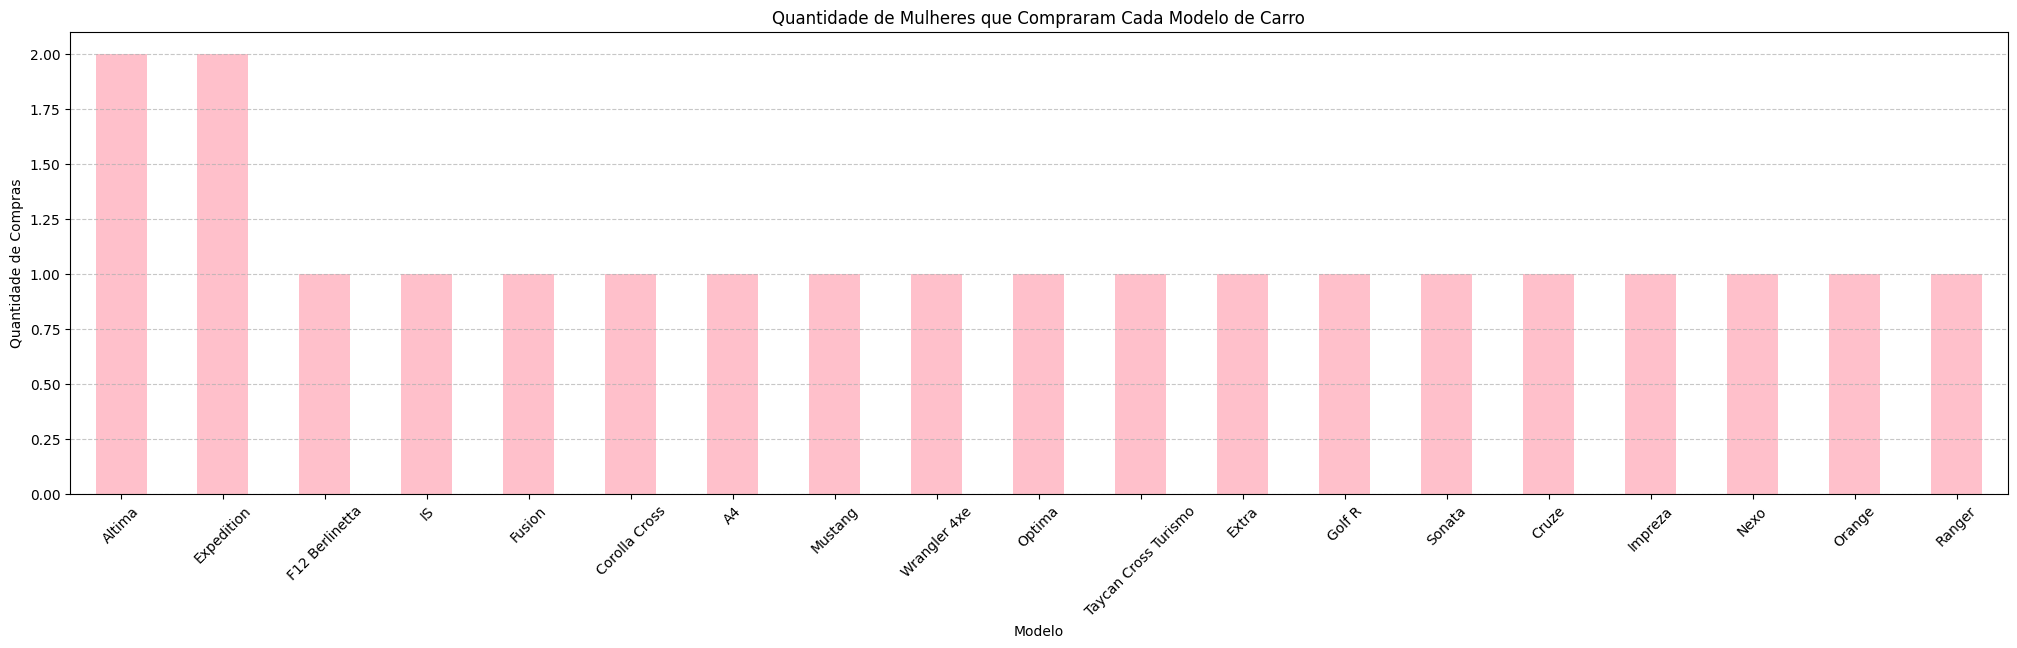

In [ ]:
df_female = df[df['gender'] == 'Female']

# Contar a quantidade de mulheres que compraram cada modelo
model_counts_female = df_female['model_name'].value_counts()

# modelos de carros mais comprados por mulheres
plt.figure(figsize=(25, 6))
model_counts_female.plot(kind='bar', color='pink')
plt.title('modelos de carros mais comprados por mulheres')
plt.xlabel('Modelo')
plt.ylabel('Quantidade de Compras')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

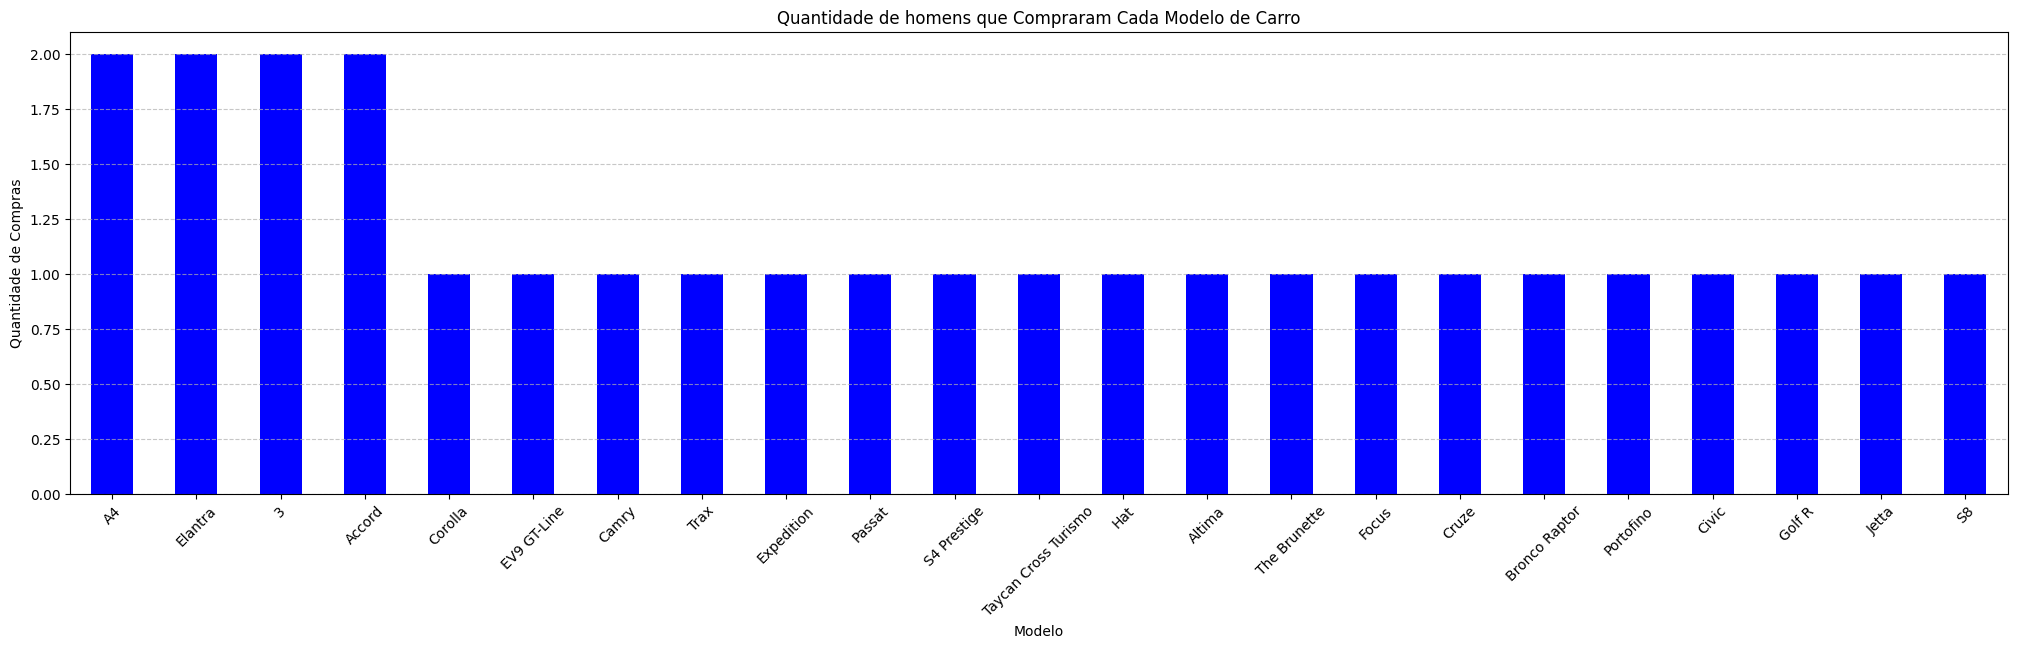

In [ ]:
df_male = df[df['gender'] == 'Male']

# Contar a quantidade de homens que compraram cada modelo
model_counts_male = df_male['model_name'].value_counts()

# modelos de carros mais comprados por homens
plt.figure(figsize=(25, 6))
model_counts_male.plot(kind='bar', color='blue')
plt.title('modelos de carros mais comprados por homens')
plt.xlabel('Modelo')
plt.ylabel('Quantidade de Compras')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Conclusão

O database continha poucos dados diante da abordagem escolhida, o que limitou MUITO as análises. Dito isso, após combinar as tabelas e criar um dataframe a parte, foi necessário imputar alguns dados para que o df ficasse mais "recheado", mas ainda sim, o conjunto ficou muito pequeno e, sobretudo, com dados 'falsos'. No entanto, mesmo com essas características, pude fazer algumas pequenas análises, mas que claro, ficariam melhores se o conjunto de dados fosse maior.